Aim
Since my first week on this platform, I have been fascinated by the topic of time series analysis. This kernel is prepared to be a container of many broad topics in the field of time series analysis. My motive is to make this the ultimate reference to time series analysis for beginners and experienced people alike.

Some important things
This kernel is a work in progress so every time you see on your home feed and open it, you will surely find fresh content.
I am doing this only after completing various courses in this field. I continue to study more advanced concepts to provide more knowledge and content.
If there is any suggestion or any specific topic you would like me to cover, kindly mention that in the comments.
If you like my work, be sure to upvote(press the like button) this kernel so it looks more relevant and meaningful to the community.

In [ ]:
# Importing libraries
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 
# Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline
from pylab import rcParams
from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error
print(os.listdir("../input"))

# <a id='1'>1. Introduction to date and time</a>

### How to import data?
First, we import all the datasets needed for this kernel. The required time series column is imported as a datetime column using **parse_dates** parameter and is also selected as index of the dataframe using **index_col** parameter. 
#### Data being used:-
1. Google  Stocks Data
2. Humidity in different world cities
3. Microsoft  Stocks Data
3. Pressure in different world cities

In [ ]:
google = pd.read_csv('../input/stock-time-series-20050101-to-20171231/GOOGL_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
google.head()

In [ ]:
humidity = pd.read_csv('../input/historical-hourly-weather-data/humidity.csv', index_col='datetime', parse_dates=['datetime'])
humidity.tail()

### How to prepare data?
Google stocks data doesn't have any missing values but humidity data does have its fair share of missing values. It is cleaned using **fillna()** method with **ffill** parameter which propagates last valid observation to fill gaps

In [ ]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method='ffill')
humidity.head()

## <a id='1.3'>1.3 Visualizing the datasets</a>

In [ ]:
humidity["Kansas City"].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is monthly frequency.
plt.title('Humidity in Kansas City over time(Monthly frequency)')
plt.show()

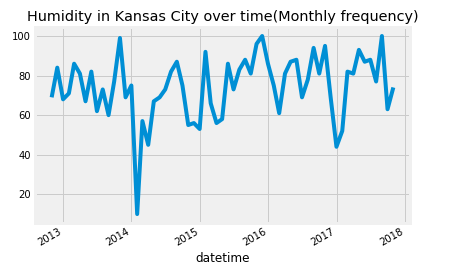

In [ ]:
google['2008':'2010'].plot(subplots=True, figsize=(10,12))
plt.title('Google stock attributes from 2008 to 2010')
plt.savefig('stocks.png')
plt.show()

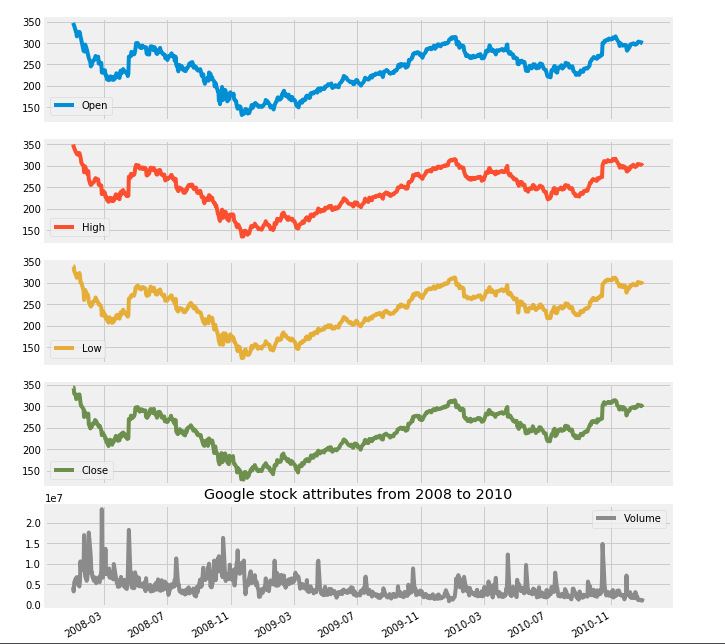

## <a id='1.4'>1.4 Timestamps and Periods</a>

In [ ]:
# Creating a Timestamp
timestamp = pd.Timestamp(2017, 1, 1, 12)
timestamp

In [ ]:
# Creating a period
period = pd.Period('2017-01-01')
period

In [ ]:
# Converting timestamp to period
new_period = timestamp.to_period(freq='H')
new_period

## <a id='1.5'>1.5 Using date_range</a>

What is date_range and how is it useful?
date_range is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [ ]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start='1/1/18', end='1/9/18')
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Creating a datetimeindex without specifying start date and using periods
dr3 = pd.date_range(end='1/4/2014', periods=8)
dr3

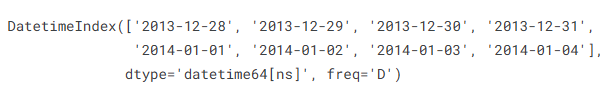